In [1]:
%load_ext autoreload
%autoreload 2

# Calculate the b-factor on ECCO4v4

In [2]:
import numpy as np
import xarray as xr
from xgcm import Grid
import glob
import matplotlib.pyplot as plt

In [9]:
rootdir = '/data2/project/ECCO4v4/'
# neutral density
localdir = 'GAMMAN/*/'
filename = 'GAMMAN_*.nc'
gamma = xr.open_mfdataset(rootdir+localdir+filename)#.drop(['XC','YC','Z','timestep','time_bnds'])
# temperature
localdir = 'nctiles_monthly/THETA/*/'
filename = 'THETA_*.nc'
theta = xr.open_mfdataset(rootdir+localdir+filename)#.drop(['XC','YC','Z','timestep','time_bnds'])
# salinity
localdir = 'nctiles_monthly/SALT/*/'
filename = 'SALT_*.nc'
salt = xr.open_mfdataset(rootdir+localdir+filename)#.drop(['XC','YC','Z','timestep','time_bnds'])

In [10]:
rootdir = '/home/gmacgilchrist/data/ECCO/'
filename = 'ECCO-GRID.nc'
grid = xr.open_dataset(rootdir+filename)

In [11]:
ds = xr.merge([gamma,theta,salt,grid]).rename({'tile':'face'}).isel(time=0)

In [12]:
ds

<xarray.Dataset>
Dimensions:    (face: 13, i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_l: 50, k_p1: 51, k_u: 50, nv: 2)
Coordinates:
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * face       (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC         (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC         (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    Z          (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    timestep   int64 dask.array<chunksize=(), meta=np.ndarray>
    time       datetime64[ns] 1992-01-16T12:00:00
    time_bnds  (nv) datetime64[ns] dask.array<chunksize=(2,), meta=np.ndarray>
  * k_p1       (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * j_g        (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k_u        (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_l        (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    XG         (face, j_g, i_g) float32 ...
    YG         (face, j_g, i_g) float32 ...
    CS         (face, j, i) float32 ...
    SN         (face, j, i) float32 ...
    Zl         (k_l) float32 ...
    Zu         (k_u) float32 ...
    Zp1        (k_p1) float32 ...
    dxC        (face, j, i_g) float32 ...
    rAs        (face, j_g, i) float32 ...
    rAw        (face, j, i_g) float32 ...
    Depth      (face, j, i) float32 ...
    rA         (face, j, i) float32 ...
    dxG        (face, j_g, i) float32 ...
    dyG        (face, j, i_g) float32 ...
    rAz        (face, j_g, i_g) float32 ...
    dyC        (face, j_g, i) float32 ...
    PHrefC     (k) float32 ...
    drC        (k_p1) float32 ...
    PHrefF     (k_p1) float32 ...
    drF        (k) float32 ...
    hFacS      (k, face, j_g, i) float32 ...
    hFacC      (k, face, j, i) float32 ...
    hFacW      (k, face, j, i_g) float32 ...
    maskW      (k, face, j, i_g) bool ...
    maskC      (k, face, j, i) bool ...
    maskS      (k, face, j_g, i) bool ...
Dimensions without coordinates: nv
Data variables:
    GAMMAN     (k, face, j, i) float32 dask.array<chunksize=(50, 13, 90, 90), meta=np.ndarray>
    THETA      (k, face, j, i) float32 dask.array<chunksize=(50, 13, 90, 90), meta=np.ndarray>
    SALT       (k, face, j, i) float32 dask.array<chunksize=(50, 13, 90, 90), meta=np.ndarray>

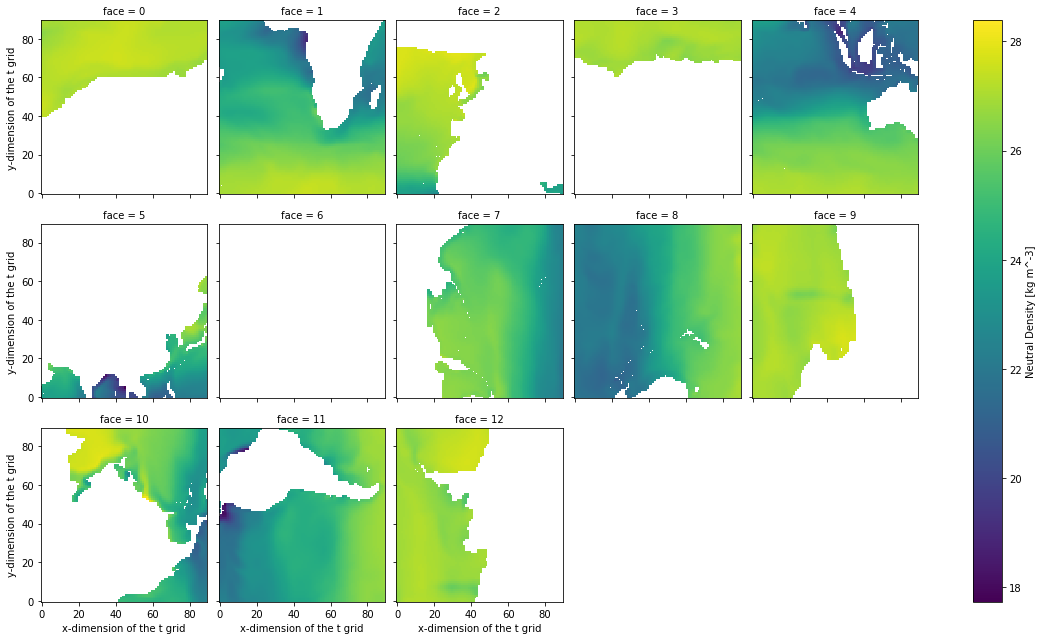

In [13]:
ds['GAMMAN'].isel(k=0).plot(col='face', col_wrap=5)

In [14]:
# define the connectivity between faces
face_connections = {'face':
                    {0: {'X':  ((12, 'Y', False), (3, 'X', False)),
                         'Y':  (None,             (1, 'Y', False))},
                     1: {'X':  ((11, 'Y', False), (4, 'X', False)),
                         'Y':  ((0, 'Y', False),  (2, 'Y', False))},
                     2: {'X':  ((10, 'Y', False), (5, 'X', False)),
                         'Y':  ((1, 'Y', False),  (6, 'X', False))},
                     3: {'X':  ((0, 'X', False),  (9, 'Y', False)),
                         'Y':  (None,             (4, 'Y', False))},
                     4: {'X':  ((1, 'X', False),  (8, 'Y', False)),
                         'Y':  ((3, 'Y', False),  (5, 'Y', False))},
                     5: {'X':  ((2, 'X', False),  (7, 'Y', False)),
                         'Y':  ((4, 'Y', False),  (6, 'Y', False))},
                     6: {'X':  ((2, 'Y', False),  (7, 'X', False)),
                         'Y':  ((5, 'Y', False),  (10, 'X', False))},
                     7: {'X':  ((6, 'X', False),  (8, 'X', False)),
                         'Y':  ((5, 'X', False),  (10, 'Y', False))},
                     8: {'X':  ((7, 'X', False),  (9, 'X', False)),
                         'Y':  ((4, 'X', False),  (11, 'Y', False))},
                     9: {'X':  ((8, 'X', False),  None),
                         'Y':  ((3, 'X', False),  (12, 'Y', False))},
                     10: {'X': ((6, 'Y', False),  (11, 'X', False)),
                          'Y': ((7, 'Y', False),  (2, 'X', False))},
                     11: {'X': ((10, 'X', False), (12, 'X', False)),
                          'Y': ((8, 'Y', False),  (1, 'X', False))},
                     12: {'X': ((11, 'X', False), None),
                          'Y': ((9, 'Y', False),  (0, 'X', False))}}}

ds['drW'] = ds.hFacW * ds.drF #vertical cell size at u point
ds['drS'] = ds.hFacS * ds.drF #vertical cell size at v point
ds['drC'] = ds.hFacC * ds.drF #vertical cell size at tracer point

metrics = {
    ('X',): ['dxC', 'dxG'], # X distances
    ('Y',): ['dyC', 'dyG'], # Y distances
    ('Z',): ['drW', 'drS', 'drC'], # Z distances
    ('X', 'Y'): ['rA', 'rAz', 'rAs', 'rAw'] # Areas
}

# create the grid object
xgrid = Grid(ds, periodic=False, face_connections=face_connections, metrics=metrics)
xgrid

<xgcm.Grid>
Y Axis (not periodic, boundary=None):
  * center   j --> left
  * left     j_g --> center
Z Axis (not periodic, boundary=None):
  * center   k --> left
  * left     k_l --> center
  * outer    k_p1 --> center
  * right    k_u --> center
X Axis (not periodic, boundary=None):
  * center   i --> left
  * left     i_g --> center

In [94]:
xgrid.interp(ds['dxG'],'Y')

ValueError: 'i_g' not found in array dimensions ('face', 'j_g', 'i')

In [88]:
# Calculate gradients in T, S, and gamma
def dhorz(da):
    C = da.copy()
    dCx = xgrid.diff(C,'X')
    dCdx = dCx/xgrid.get_metric(dCx,'X')
    dCy = xgrid.diff(C,'Y',boundary='fill')
    dCdy = dCy/xgrid.get_metric(dCy,'Y')
    return dCdx, dCdy

# Horizontal
dTdx, dTdy = dhorz(ds['THETA'])
dSdx, dSdy = dhorz(ds['SALT'])
dGdx, dGdy = dhorz(ds['GAMMAN'])

def dvert(da):
    C = da.copy()
    dCz = xgrid.interp(C,'Z',boundary='extrapolate')
    dCdz = xgrid.derivative(dCz, 'Z',boundary='extrapolate')
    return dCdz

# Vertical
dTdz = dvert(ds['THETA'])
dSdz = dvert(ds['SALT'])
dGdz = dvert(ds['GAMMAN'])

In [42]:
# Calculate derivative of locally referenced potential density
rho = ds['rhoinsitu']
alpha = ds['alpha']
beta = ds['beta']

drdx = rho*(-alpha*dTdx + beta*dSdx)
drdy = rho*(-alpha*dTdy + beta*dSdy)
drdz = rho*(-alpha*dTdz + beta*dSdz)

In [43]:
# Calculate absolute magnitude of gradients
absgradr = xr.ufuncs.sqrt(xr.ufuncs.square(drdx)+
                          xr.ufuncs.square(drdy)+
                          xr.ufuncs.square(drdz))
absgradg = xr.ufuncs.sqrt(xr.ufuncs.square(dgdx)+
                          xr.ufuncs.square(dgdy)+
                          xr.ufuncs.square(dgdz))

In [44]:
# Calculate b as ratio
b = absgradg/absgradr

In [45]:
b.load();

<ipython-input-55-08d7ea99cc74>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(ds['geolat'].sel(select,method='nearest'),


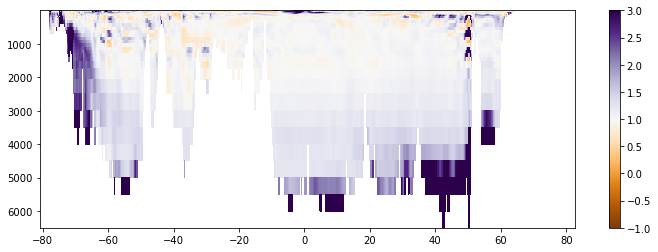

In [55]:
select = {'xh':-180}
fig,ax = plt.subplots(figsize=(12,4))
im = ax.pcolormesh(ds['geolat'].sel(select,method='nearest'),
                   ds['z_l'],
                   b.sel(select,method='nearest').transpose(),
                   vmin=-1,vmax=3,cmap='PuOr')
plt.colorbar(im,ax=ax)
ax.invert_yaxis()

<ipython-input-51-927c4415ce7f>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(ds['geolat'].sel(select,method='nearest'),


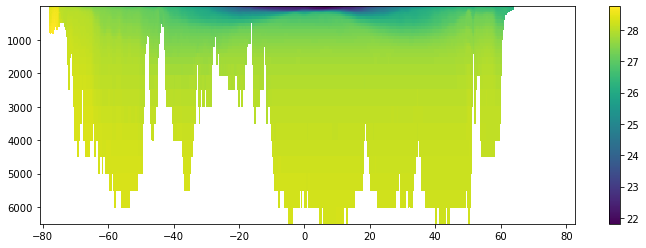

In [51]:
select = {'xh':-180}
fig,ax = plt.subplots(figsize=(12,4))
im = ax.pcolormesh(ds['geolat'].sel(select,method='nearest'),
           ds['z_l'],
           ds['g'].sel(select,method='nearest').transpose())
ax.invert_yaxis()
plt.colorbar(im,ax=ax)